# Spam Filtering

## Importing neccessaty libraries

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import nltk
from nltk.corpus import stopwords

In [64]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## preprocessing function

In [65]:
def preprocess_message(message):
    stop_words = set(stopwords.words('english'))  # stopwords list
    words = message.lower().split()  # Split message into words
    filtered_words = [word for word in words if word.isalnum() and word not in stop_words]  # remove stopwords and non-alphanumeric words
    return ' '.join(filtered_words)

## Load the dataset

In [66]:
df = pd.read_csv("spam.csv", encoding='latin-1')

## clean the dataset

In [67]:
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

#Label encoding

In [68]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

<ipython-input-68-3d7c89935395>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].map({'ham': 0, 'spam': 1})


## Apply preprocessing to all messages

In [69]:
df['message'] = df['message'].apply(preprocess_message)

## Feature extraction: vectorizing the text

In [70]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['message'])


## Define target variable

In [71]:
y = df['label']

## Split the data into training and testing sets

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Train the Naive Bayes model
   

In [73]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

## Make predictions

In [74]:
y_pred = model.predict(X_test)

## Evaluate the model
    


In [75]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))


Accuracy: 96.59%
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       965
           1       0.87      0.88      0.87       150

    accuracy                           0.97      1115
   macro avg       0.92      0.93      0.93      1115
weighted avg       0.97      0.97      0.97      1115



#**As we can see we are achieving  96.59% accuaracy can be considered good for our model**

## create function to classify an email as spam or not

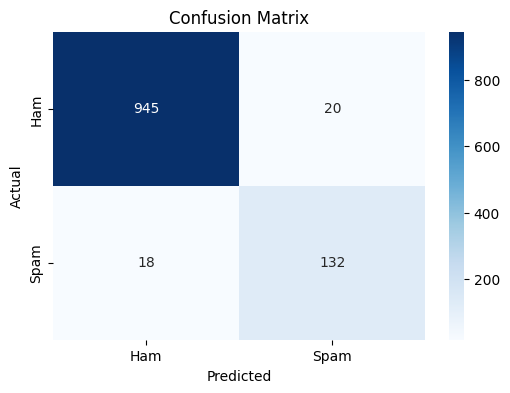

In [76]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



## Wordcloud of Stopwords

## Spam WordCloud

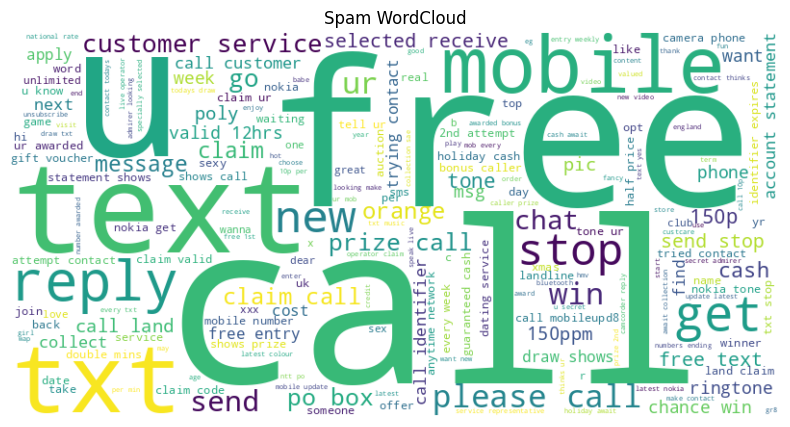

In [77]:


stop_words = set(stopwords.words('english'))
spam_messages = ' '.join(df[df['label'] == 1]['message'])
ham_messages = ' '.join(df[df['label'] == 0]['message'])

spam_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(spam_messages)
ham_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(ham_messages)

plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Spam WordCloud')
plt.show()



##Ham WordCloud

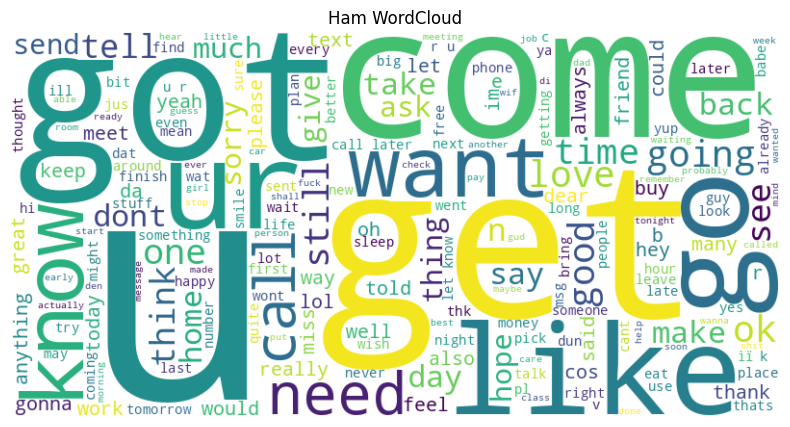

In [78]:
plt.figure(figsize=(10, 5))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Ham WordCloud')
plt.show()

In [79]:

def classify_email(email):

    cleaned_email = preprocess_message(email)

    email_vector = vectorizer.transform([cleaned_email])

    prediction = model.predict(email_vector)

    # return the result
    return "Spam" if prediction[0] == 1 else "Not Spam"




## example of using the function

In [80]:
example_email = "Congratulations! You've won a free ticket to the Bahamas. Call now!"
result = classify_email(example_email)
print(f"The email is classified as: {result}")

The email is classified as: Spam
